# Importing Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, f1_score, roc_curve,auc
import warnings
from sklearn.exceptions import FitFailedWarning
warnings.simplefilter('ignore', FitFailedWarning)
from imblearn.over_sampling import RandomOverSampler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

# Importing Dataset

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# No Missing Values

In [ ]:
df.isna().any().any()

False

# Encoding Categorical Values

In [ ]:
#Columns with string values
categorical_column = ['Attrition', 'BusinessTravel', 'Department','Gender', 'JobRole', 'MaritalStatus', 'OverTime','EducationField']
encoder=LabelEncoder()
df[categorical_column]=df[categorical_column].apply(encoder.fit_transform)

# Seperating into X and y

In [ ]:
y=df['Attrition']
X=df.drop(['EmployeeCount','Attrition','EmployeeNumber','Over18','StandardHours'],axis=1)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42,replacement=True)
X_, Y1 = rus.fit_resample(X,y)
X1 = pd.DataFrame(X_,columns=X.columns)

ros = RandomOverSampler(random_state=42)
X_, Y2 = ros.fit_resample(X,y)
X2 = pd.DataFrame(X_,columns=X.columns)

#Undersampling

In [ ]:
X=X1
y=Y1

# Spliting into Train and Test Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)


## PCA

[0.17445552 0.0699519  0.06218277 0.05725446 0.05020425 0.04788498
 0.04052414 0.03895564 0.03780679 0.03636596 0.03612603 0.03376543
 0.03244581 0.03095886 0.02949425 0.028637   0.02676959 0.02558136
 0.02322786 0.02290547 0.02084384 0.01638863 0.01252833 0.01023981
 0.00937677 0.00734672 0.00644248 0.00611985 0.00391797 0.00129754]
Two PCs explain 99.99999999999997 % of variance cumulatively


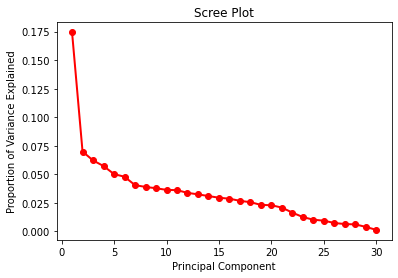

In [ ]:
from sklearn.preprocessing import StandardScaler
pca = PCA(random_state=0)
principalComponents = pca.fit_transform(StandardScaler().fit_transform(X_train))
print(pca.explained_variance_ratio_)
print('Two PCs explain', sum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

[7.07406869e-01 2.90221289e-01 2.36234386e-03 5.97440876e-06
 1.15981582e-06 8.95438373e-07 6.02246140e-07 1.92869783e-07
 1.82251798e-07 8.49179133e-08 7.85911659e-08 6.56258045e-08
 6.11524850e-08 3.95425679e-08 2.85565854e-08 2.34040072e-08
 1.72544723e-08 1.64626190e-08 1.57284739e-08 1.49521618e-08
 1.29689310e-08 7.40915683e-09 6.39818634e-09 5.67571090e-09
 3.31543749e-09 2.95487040e-09 2.42336169e-09 1.93983180e-09
 1.09053057e-09 6.35438677e-10]
Two PCs explain  99.99999999999999 % of variance cumulatively


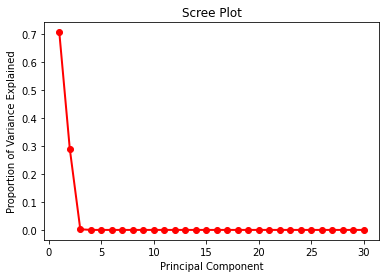

In [ ]:
pca = PCA(random_state=0)
principalComponents = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)
print('Two PCs explain ', sum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

[0.70740687 0.29022129]
Two PCs explain  99.76281581107092 % of variance cumulatively


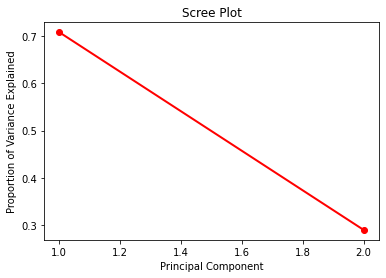

In [ ]:
pca = PCA(n_components=2, random_state=0)
principalComponents = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)
print('Two PCs explain ', sum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter(principalComponents, x=0, y=1, color=y_train)
fig.show()
X_train = principalComponents
X_test = pca.transform(X_test)

### Sample Row

In [ ]:
# X_train.iloc[0].to_dict()

# Hyper-parameter Tuning Using Grid Search CV

In [ ]:
def tune_hyperparameters(model,X,y):
  param_grid = {"solver":['svd', 'lsqr', 'eigen'], "shrinkage":['auto',0.1,0.01,1,0]}
  grid_search = GridSearchCV(model,param_grid=param_grid,scoring='accuracy')
  grid_search.fit(X,y)
  print("Best Params: ",grid_search.best_params_)
  return grid_search.best_params_

In [ ]:
best_params = tune_hyperparameters(LinearDiscriminantAnalysis(),X_train,y_train)
best_params

Best Params:  {'shrinkage': 1, 'solver': 'lsqr'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning:

One or more of the test scores are non-finite: [       nan 0.54378109 0.54378109        nan 0.54378109 0.54378109
        nan 0.54079602 0.54079602        nan 0.55278155 0.55278155
        nan 0.54079602 0.54079602]



{'shrinkage': 1, 'solver': 'lsqr'}

# Performing Linear Discrimant Analysis

In [ ]:
def train_predict_evaluate(model,X_train,y_train,X_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  print("Accuracy: ",accuracy_score(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred,zero_division=0))
  print("Recall: ",recall_score(y_test,y_pred,zero_division=0))
  print("F1 Score: ",f1_score(y_test,y_pred,zero_division=0))
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

  
  fpr,tpr,thresholds = roc_curve(y_test,y_pred)
  plt.plot(fpr, tpr,color='green',label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
  plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend(loc="lower right")
  plt.show()

Accuracy:  0.6013986013986014
Precision:  0.6
Recall:  0.72
F1 Score:  0.6545454545454547
Confusion Matrix:
 [[32 36]
 [21 54]]


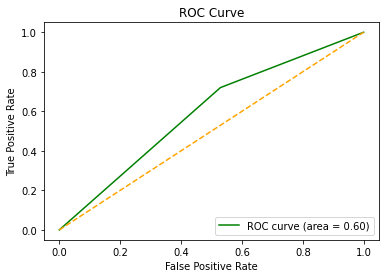

In [ ]:
train_predict_evaluate(LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr'),X_train,y_train,X_test)

# K-Fold Cross Validation

In [ ]:
def cross_validation(model,X,y):
  scores = cross_validate(model, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))

  metrics = []
  metrics.append(np.mean(scores['test_accuracy']))
  metrics.append(np.mean(scores['test_precision']))
  metrics.append(np.mean(scores['test_recall']))
  metrics.append(np.mean(scores['test_f1']))

  print("Accuracy: ",metrics[0])
  print("Precision: ",metrics[1])
  print("Recall: ",metrics[2])
  print("F1 Score: ",metrics[3])

  return metrics

In [ ]:
metrics = []

In [ ]:
metrics.append(cross_validation(LinearDiscriminantAnalysis(**best_params),X,y))

Accuracy:  0.5505935050391937
Precision:  0.5392920592420454
Recall:  0.6965425531914893
F1 Score:  0.6075559721494714


# Performance

In [ ]:
mdf = pd.DataFrame(metrics,columns=["Accuracy","Precision","Recall","F1 Score"])
mdf.head()

,Accuracy,Precision,Recall,F1 Score
0,0.550594,0.539292,0.696543,0.607556


# Oversampling

In [ ]:
X=X2
y=Y2

# Spliting into Train and Test Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)


## PCA

[0.16644652 0.0694282  0.06260377 0.05545875 0.04957067 0.04319266
 0.03892715 0.03789529 0.0366817  0.03595579 0.0347389  0.0338919
 0.0327645  0.03167072 0.03036476 0.02970004 0.02897449 0.02793647
 0.02636949 0.02553762 0.02380797 0.01620716 0.015238   0.01028282
 0.00917458 0.00775493 0.00711501 0.00662595 0.00420068 0.00148352]
Two PCs explain 100.0 % of variance cumulatively


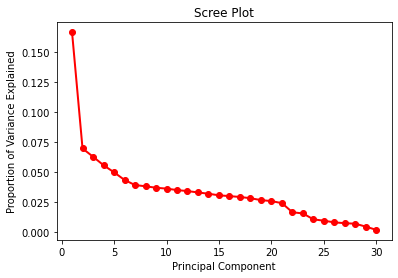

In [ ]:
from sklearn.preprocessing import StandardScaler
pca = PCA(random_state=0)
principalComponents = pca.fit_transform(StandardScaler().fit_transform(X_train))
print(pca.explained_variance_ratio_)
print('Two PCs explain', sum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

[7.20048171e-01 2.77676640e-01 2.26592418e-03 5.74106555e-06
 1.12810912e-06 9.58664346e-07 5.91304063e-07 1.87329933e-07
 1.61366090e-07 9.14259500e-08 7.53405986e-08 6.89022999e-08
 5.65975611e-08 4.40198804e-08 2.72155701e-08 2.18684911e-08
 1.77585974e-08 1.66910231e-08 1.59261694e-08 1.43927773e-08
 1.30687978e-08 7.86457507e-09 7.37091258e-09 5.62793173e-09
 3.34037666e-09 3.02149252e-09 2.73771127e-09 2.01690158e-09
 1.19011579e-09 6.85845420e-10]
Two PCs explain  100.0 % of variance cumulatively


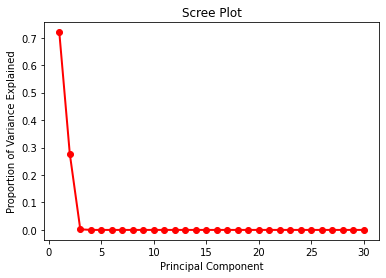

In [ ]:
pca = PCA(random_state=0)
principalComponents = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)
print('Two PCs explain ', sum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

[0.72004817 0.27767664 0.00226592]
Two PCs explain  99.99907350973206 % of variance cumulatively


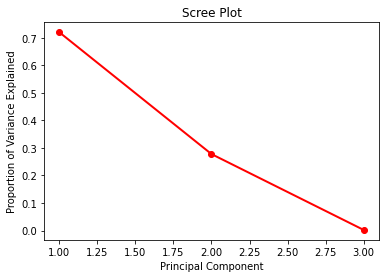

In [ ]:
pca = PCA(n_components=3, random_state=0)
principalComponents = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)
print('Two PCs explain ', sum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter(principalComponents, x=0, y=1, color=y_train)
fig.show()
X_train = principalComponents
X_test = pca.transform(X_test)

### Sample Row

In [ ]:
# X_train.iloc[0].to_dict()

# Hyper-parameter Tuning Using Grid Search CV

In [ ]:
def tune_hyperparameters(model,X,y):
  param_grid = {"solver":['svd', 'lsqr', 'eigen'], "shrinkage":['auto',0.1,0.01,1,0]}
  grid_search = GridSearchCV(model,param_grid=param_grid,scoring='accuracy')
  grid_search.fit(X,y)
  print("Best Params: ",grid_search.best_params_)
  return grid_search.best_params_

In [ ]:
best_params = tune_hyperparameters(LinearDiscriminantAnalysis(),X_train,y_train)
best_params

Best Params:  {'shrinkage': 'auto', 'solver': 'lsqr'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning:

One or more of the test scores are non-finite: [       nan 0.59619167 0.59619167        nan 0.58749435 0.58749435
        nan 0.59329145 0.59329145        nan 0.59155064 0.59155064
        nan 0.59503393 0.59503393]



{'shrinkage': 'auto', 'solver': 'lsqr'}

# Performing Linear Discrimant Analysis

In [ ]:
def train_predict_evaluate(model,X_train,y_train,X_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  print("Accuracy: ",accuracy_score(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred,zero_division=0))
  print("Recall: ",recall_score(y_test,y_pred,zero_division=0))
  print("F1 Score: ",f1_score(y_test,y_pred,zero_division=0))
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

  
  fpr,tpr,thresholds = roc_curve(y_test,y_pred)
  plt.plot(fpr, tpr,color='green',label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
  plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend(loc="lower right")
  plt.show()

Accuracy:  0.6094594594594595
Precision:  0.6105263157894737
Recall:  0.7360406091370558
F1 Score:  0.667433831990794
Confusion Matrix:
 [[161 185]
 [104 290]]


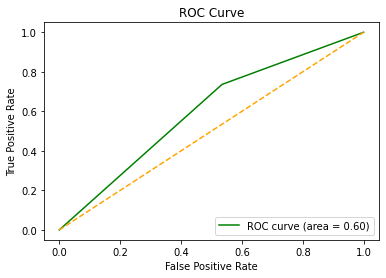

In [ ]:
train_predict_evaluate(LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr'),X_train,y_train,X_test)

# K-Fold Cross Validation

In [ ]:
def cross_validation(model,X,y):
  scores = cross_validate(model, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))

  metrics = []
  metrics.append(np.mean(scores['test_accuracy']))
  metrics.append(np.mean(scores['test_precision']))
  metrics.append(np.mean(scores['test_recall']))
  metrics.append(np.mean(scores['test_f1']))

  print("Accuracy: ",metrics[0])
  print("Precision: ",metrics[1])
  print("Recall: ",metrics[2])
  print("F1 Score: ",metrics[3])

  return metrics

In [ ]:
metrics = []

In [ ]:
metrics.append(cross_validation(LinearDiscriminantAnalysis(**best_params),X,y))

Accuracy:  0.7631751402222202
Precision:  0.7529061663247458
Recall:  0.7850926565945822
F1 Score:  0.7682790579917442


# Performance

In [ ]:
mdf = pd.DataFrame(metrics,columns=["Accuracy","Precision","Recall","F1 Score"])
mdf.head()

,Accuracy,Precision,Recall,F1 Score
0,0.763175,0.752906,0.785093,0.768279
